# Zhlukovanie s využitím K-means 

K-means predstavuje jeden z najpopulárnejších a najjednoduchších algoritmov patriacich do oblasti strojového učenia bez učiteľa. Cieľom algoritmu je zoskupiť údaje (pozorovania) do klastrov na základe istého vzoru, resp. ich vzájomnej vzdialenosti. 

Algoritmus sa teda snaží identifikovať vzory/klastre na základe výpočtu vzdialenosti medzi jednotlivými bodmi/dátami. Pre výpočet vzdialenosti používa rôzne prístupy. Podrobnejšie sa s ním môžeme oboznámiť v dokumentácii v [scikit learn](http://scikit-learn.org/stable/modules/clustering.html#k-means)

Základné charakteristiky:

* rozdeľuje množinu dát do disjunktných klastrov
* každý klaster je reprezentovaný priemerom vzdialenosti medzi jednotlivými bodmi klastra, ktorý sa nazýv *centroid*
* vo všeobecnosti platí, že centroidy nie sú skutočné hodnoty pozorovaní údaje pôvodného dátového súboru, ale vypočítané hodnoty 
* cieľom algoritmu K-means je nájsť také centroidy, ktoré minimalizujú rozptyl (označovaný ako *inertia*), sumu štvorcov vzdialenosti.

Musíme brať do úvahy, že:

* nemusíme nájsť najoptimálnejšie globálne riešenie
* počet klastrov určujeme pred použitím metódy K-means
* k-means je limitovaný lineárnymi hranicami klastrov
* k-means je výpočtovo náročný v prípade väčších dátových súborov

## Import knižníc

Keďže používame grafickú knižnicu *altair*, musíme si byť istí, že máme nainštalovanú podporu pre Javascript v podobe knižnice Vega. Knižnica je už natívnou súčasťou IDE Anaconda, ale v MS Azure je k dispozícii staršia verzia, preto musíme spraviť nasledujúce úpravy.

In [1]:
!pip install vega

     |████████████████████████████████| 2.2MB 2.5MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


Importujeme dobre známe knižnice.

In [2]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')
from sklearn.cluster import KMeans

## Načítanie dát

In [3]:
file_url = 'taxstats2015.csv'

Parameter *usecols* určuje podmnožinu stĺpcov, ktoré chceme importovať. V našom prípade budeme skúmať potenciálne klastre medzi dvoma premennými.

In [4]:
df = pd.read_csv(file_url, usecols=['Postcode', 'Average net tax', 'Average total deductions'])

## EDA

Preveríme základné charakteristiky premenných.

In [5]:
df.head()

Postcode  Average total deductions  Average net tax
0      2000                      2071            27555
1      2006                      3804            28142
2      2007                      1740            15649
3      2008                      3917            53976
4      2009                      3433            32430

In [6]:
df.tail()

Postcode  Average total deductions  Average net tax
2468       870                      2377            14788
2469       872                      1218             9017
2470       880                      2309            16574
2471       885                      3039            28795
2472       886                      2191            18141

In [7]:
df.describe()

Postcode  Average total deductions  Average net tax
count  2473.000000               2473.000000      2473.000000
mean   4098.385362               2682.669632     15857.382936
std    1496.853965               1236.193614      7915.109176
min     800.000000                629.000000      5879.000000
25%    2843.000000               2120.000000     11315.000000
50%    3874.000000               2440.000000     13618.000000
75%    5166.000000               2877.000000     17845.000000
max    7470.000000              25472.000000     90485.000000

## Štandardizácia dát

Vo výpočte vzdialeností medzi klastrami zohrávajú dôležitú úlohu rozdiel vo veľkosti jednotlivých premenných, ktoré vstupujú do algoritmu. Pre výpočet vzdialenosti sa používajú rôzne prístupy, ale vždy, keď nie sú premenné na rovnakej škále, má premenná s veľkými hodnotami tendenciu výrazne ovplyvniť výsledné rozloženie klastrov.
Z toho dôvodu je často nevyhnunté údaje pred vstupom do algoritmu normalizovať alebo štandardizovať.

Existuje viacero možností, ako môžeme údaje štandardizovať. Podrobnejšie sme sa im venovali v kapitole venovanej príprave dát. V tejto časti si predstavíme dva základné prístupy

- min-max - od každej hodnoty odpočítame minimum a výsledok vydelíme rozdielom medzi maximálnou a minimálnou hodnotou. Vzhľadom na veľký vplyv extrémnych hodnôt by sme mali mať predstavu, ako sú údaje v normalizovanej premennej rozložené.
- z-score - od každej hodnoty odpočítame priemernú hodnotu a výsledok vydelíme štandardnou odchýľkou. Upravené údaje budú mať priemer rovný nule a štandardnú odchýľku 1. 

Inicializácia min_max sa realizuje nasledovným spôsobom.

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

Podobne môžeme inicializovať metódu pre štandardizáciu údajov.

In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

V ďalšom kroku ich použijeme pre úrapvu dát pred vstupom do algoritmu *k-means*. 

## Modelovanie dát

Algoritmus *k-means* je súčasťou knižnice *scikit-learn*. Rovnako ako v predchádzajúcich kapitolách, aj v prípade tohto algoritmu najprv vytvoríme inštanciu algoritmu s definovanými hyperparametrami, natrénujeme model na trénovacej množine dát a následne budeme predikovať výsledky pre testovaciu množinu dát.

In [10]:
kmeans = KMeans(random_state=42)

Budeme si všímať len náhodné premenné so spojitými číselnými hodnotami. Premennú *Postcode* nemá zmysel použiť, keďže sa jedná o nominálnu premennú. 

In [11]:
X = df[['Average net tax', 'Average total deductions']]

Údaje musíme pred použitím v algoritme normalizovať alebo štandardizovať.

In [12]:
# min_max_scaler.fit(X)
# X_min_max = min_max_scaler.transform(X)
# X_min_max

In [13]:
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[ 1.47818338, -0.49490091],
       [ 1.55236034,  0.90726658],
       [-0.02633256, -0.76271247],
       ...,
       [ 0.09055617, -0.30233549],
       [ 1.63487747,  0.28830632],
       [ 0.288572  , -0.3978091 ]])

In [14]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Po natrénovaní modelu môžeme pristúpiť k predikcií výsledných dát, stále na trénovacej množine.

In [15]:
y_preds = kmeans.predict(X_scaled)
y_preds

array([1, 7, 0, ..., 4, 7, 1], dtype=int32)

Ako výsledok vidíme číslo klastra, do ktorého daný záznam bude podľa algoritmu spadať.

In [16]:
df['cluster'] = y_preds
df.head()

Postcode  Average total deductions  Average net tax  cluster
0      2000                      2071            27555        1
1      2006                      3804            28142        7
2      2007                      1740            15649        0
3      2008                      3917            53976        6
4      2009                      3433            32430        7

## Výsledky

Teraz skúsme interpretovať výsledky podrobnejšie. Mali by sme hlavne vedieť zdôvodniť dôvod vzniku jednotlivých klastrov a ich výsledný počet. Použijeme na to kontingenčnú tabuľku. V tejto metóde musíme ako parametre zadať 

- *values* - očakáva číselné premenné, z ktorých sa agregácia má vypočítať.
- *index* - špecifikuje stĺpce, pre ktoré chceme spraviť jednotlivé agregácie.
- *aggfunc* - určuje agregačné funkcie, ktoré chceme použiť.

In [17]:
df.pivot_table(values=['Average net tax', 'Average total deductions'], index='cluster', aggfunc=np.mean)

Average net tax  Average total deductions
cluster                                           
0           10981.734820               1966.213135
1           20210.172996               2752.656118
2           15518.445652               4733.369565
3           67920.583333               9840.500000
4           13574.094609               2597.843784
5           67808.000000              22811.000000
6           42528.936170               5825.808511
7           30926.713178               3763.620155

Algoritmus *k-means* vytvoril osem klastrov. Lepšie ich budeme vedieť analyzovať, ak jednotlivé klastre vizualizujeme. Každej hodnote premennej *cluster* je priradená pre lepšiu prehľadnosť iná farba, pričom :N znanená, že sa jedná o kategorickú premennú.

In [18]:
chart = alt.Chart(df)

In [19]:
scatter_plot = chart.mark_circle()

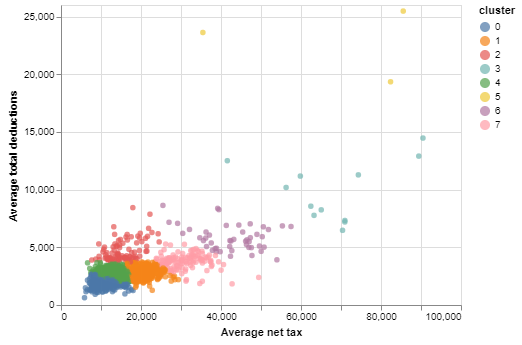

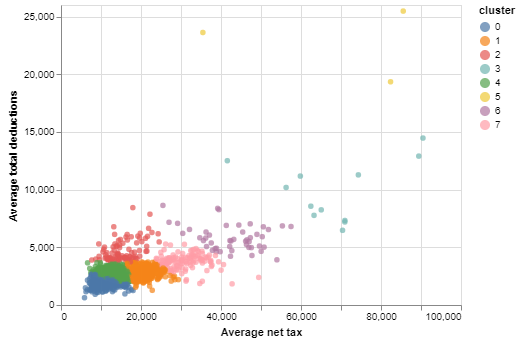

In [20]:
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster:N')

Na prvý pohľad vidíme, že rozdelenie dát do klastrov sa deje hlavne vďaka premennej na x-ovej osi a hranice medzi klastrami sú skoro vertikálne. Tušíme teda, že výsledok nebude veľmi užitočný a mali by sme sa bližšie pozrieť na úlohu jednotlivých hyperparametrov modelu.

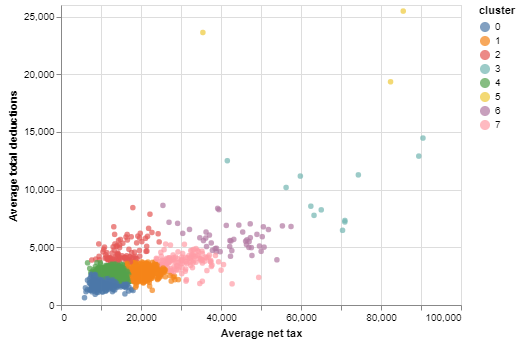

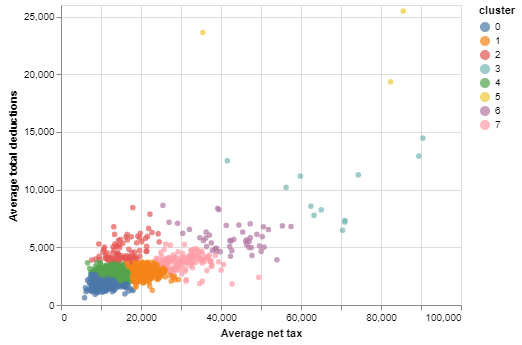

In [21]:
scatter_plot.encode(x='Average net tax', y='Average total deductions',color='cluster:N', tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']).interactive()

## Nájdenie optimálneho počtu klastrov

Nezodpovedanou otázkou stále zostáva, prečo algoritmus vytvoril práve osem klastrov. Tým sa opäť dostávame k problematike hyperparametrov, teda parametrov, ktoré by mal na základe svojich skúseností nastaviť výskumník. V prípade algoritmu *K-means* je preddefinovaný počet klastrov, na ktoré sa má algoritmus snažiť rozdeliť dátový súbor, stanovený práve na osem. Konkrétne túto hodnotu nastavujeme v hyperparametri *n_cluster*. Jeho výslednú hodnotu musíme voliť uvážene, keďže príliš málo klastrov zoskupí veľa nesúvisiacich pozorovaní dokopy, a naopak, príliš veľa malých veľmi podobných klastrov. 

Vhodný počet klastrov našťastie nenájdeme len postupnou iteráciou, ale môžeme využiť nasledujúce metódy, ktoré nám optimálny počet klastrov odhadnú: 

* metódu Elbow,
* metódu Silhouette,
* metódu MeanShift,
* funkciu [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html) z knižnice scipy, pričom ako kritérium vezmeme vzdialenosť medzi klastrami alebo jednoducho ich počet.

Napriek tomu, konečné rozhodnutie, koľko klastrov nám dáva zmysel, zostáva na nás.

### Elbow method

*Elbow method* odhaduje kompaktnosť klastrov, pričom sa sleduje hodnota SEE (Sums of Squared Error) v podobe parametra *inertia* pre rôzne počty klastrov. Aktuálne má tento parameter nasledujúcu hodnotu.

In [22]:
kmeans.inertia_

638.9903105137682

Poďme preskúmať, ako by sa hodnota menila na základe rôzneho počtu klastrov definovaných v *n_cluser*.

In [23]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 10)
inertia = []

Použijeme na to cyklus.

In [24]:
for k in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  inertia.append(kmeans.inertia_)

Výsledné hodnoty priradíme k ostatným dátam a vizualizujeme vzťah.

In [25]:
clusters['inertia'] = inertia
clusters

cluster_range       inertia
0              1  1.586459e+11
1              2  6.655056e+10
2              3  3.708115e+10
3              4  2.253880e+10
4              5  1.573607e+10
5              6  1.151998e+10
6              7  8.773492e+09
7              8  7.273944e+09
8              9  5.999906e+09

V grafe si všímame miesto, kde krivka začne klesať pod uhlom okolo 45°. 

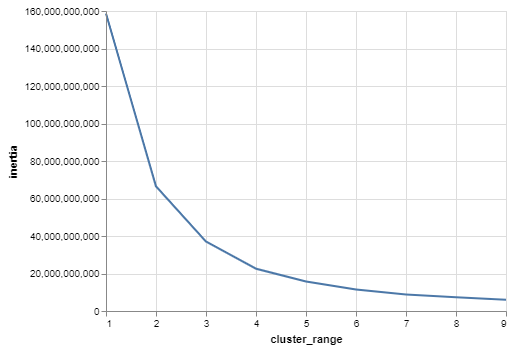

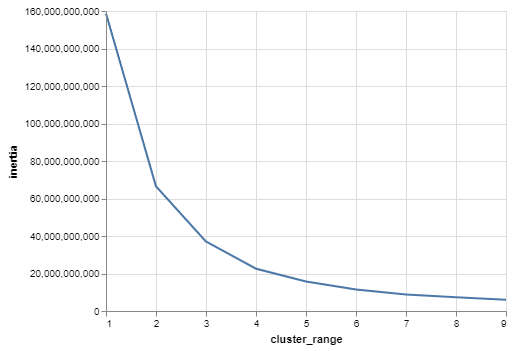

In [26]:
alt.Chart(clusters).mark_line().encode(x='cluster_range', y='inertia')

### Silhouette Analysis

Presnejší odhad môže získať s využitím Silhouette analýzy, ktorá pracuje so vzdialenosťami medzi klastrami a využíva nasledujúci vzorec:

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$
kde

$p$ je priemerná vzdialenosť k bodom najbližšieho klastra, ktorého údaje nie sú súčasťou skúmaného klastra,

$q$ je priemerná vzdialenosť medzi všetkými bodmi vnútri klastra.

* Tento parameter nadobúda hodnoty z intervalu -1 až 1. 

* Hodnota blízka 1 indikuje, že údaje klastra sú veľmi podobné, 

* Hodnota blízka -1 indikuje, že údaje nie sú v klastri navzájom podobné.

In [27]:
from sklearn.metrics import silhouette_score

Vypočítame *silhouette_score* pre rôzne hodnoty kmeans a výsledok zobrazíme v grafe.

In [28]:
sse_ = []
sse_.append([0,0])
for k in range(2,20):
    if k>1:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        sse_.append([k-1,silhouette_score(X, kmeans.labels_)])

In [29]:
sse_

[[0, 0],
 [1, 0.7463511627179947],
 [2, 0.6119882102963004],
 [3, 0.5938317978467145],
 [4, 0.5436133561845061],
 [5, 0.5052498105822446],
 [6, 0.5009742917827853],
 [7, 0.4715601500515691],
 [8, 0.47302950953842215],
 [9, 0.4495072599541057],
 [10, 0.44787770958179934],
 [11, 0.44155764870351577],
 [12, 0.44360631004928125],
 [13, 0.44130164374274294],
 [14, 0.4384461552962569],
 [15, 0.3909643947116154],
 [16, 0.3929404282349496],
 [17, 0.3898429676237596],
 [18, 0.38148646197274083]]

In [30]:
type(sse_)

list

In [31]:
df2 = pd.DataFrame(sse_, columns=['cluster_range','silhouette_score'])

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
cluster_range       19 non-null int64
silhouette_score    19 non-null float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


In [33]:
df2.head()

cluster_range  silhouette_score
0              0          0.000000
1              1          0.746351
2              2          0.611988
3              3          0.593832
4              4          0.543613

In [34]:
# clusters['silhouette_score'] = sse_
# clusters = clusters.append(pd.Series(sse_,index=['silhouette_score']), ignore_index=True)

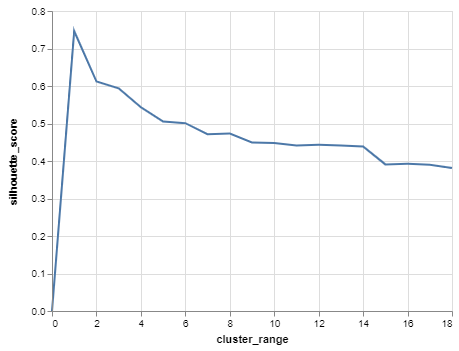

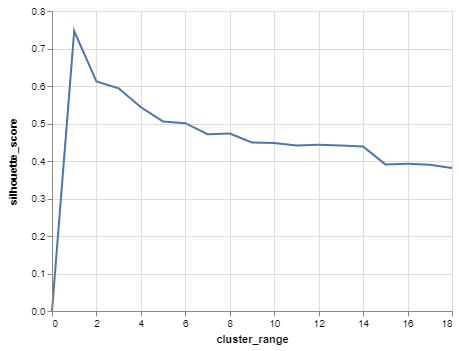

In [35]:
alt.Chart(df2).mark_line().encode(x='cluster_range', y='silhouette_score')

Opäť vidíme, že krivka začína konvergovať niekde okolo hodnoty 3-4. Skúsime preto nastaviť hodnotu parametra *n_clusters* na 3.

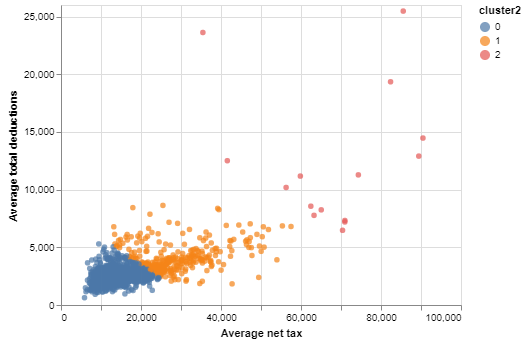

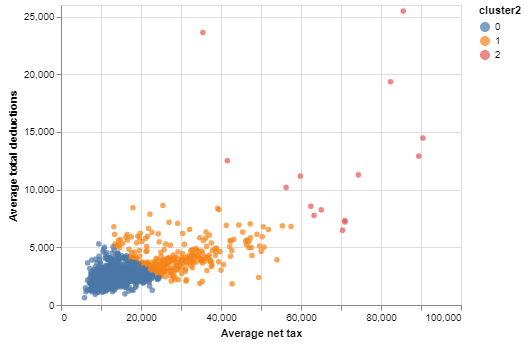

In [36]:
kmeans = KMeans(random_state=42, n_clusters=3)
kmeans.fit(X_scaled)
df['cluster2'] = kmeans.predict(X_scaled)
scatter_plot.encode(x='Average net tax', y='Average total deductions',color='cluster2:N',
    tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']
).interactive()

## Inicializácia klastrov

Ďalší zaujímavý hyperparameter, ktorý môže výrazne ovplyvniť počet a rozloženie klastrov, sa nazýva *init*. Jeho východiská hodnota je *k-means++*. Tento parameter určuje, akým spôsobom je vybraný začiatočný stred klastra, ktorý sa nazýva *centroid*. Je zrejmé, že ak by sme vybrali stred klastra nesprávne, výsledné rozloženie dát do klastrov by nebolo optimálne. Ak ponecháme východiskovú hodnotu parametra *init*, alegoritmus najprv vyberie prvý klaster a ostatné dopočíta s využitím rozloženia pravdepodobností. V niektorých prípadoch má opodstatnenie zmeniť hodnotu parametra *init* na *k-means* alebo *random*. 

S inicializáciou klastrov úzko súvisí aj ďalší hyperparameter *n_init*, ktorý definuje, koľkokrát sa algoritmus snaží inicializovať klaster. 

In [37]:
kmeans = KMeans(random_state=42, n_clusters=3, init='random', n_init=1)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

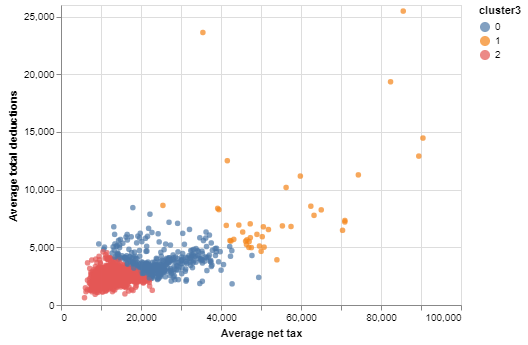

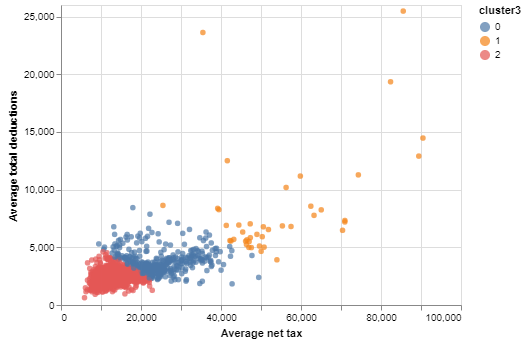

In [38]:
df['cluster3'] = kmeans.predict(X_scaled)
alt.Chart(df).mark_circle().encode(x='Average net tax', y='Average total deductions',color='cluster3:N',
    tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions']
).interactive()

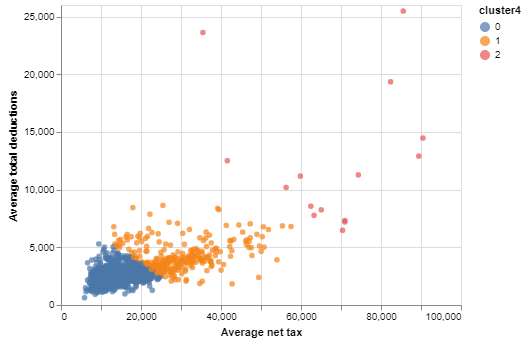

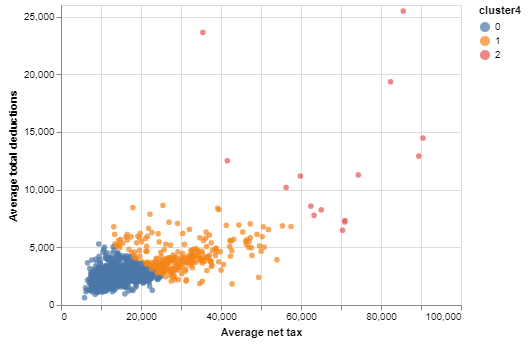

In [39]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X_scaled)
df['cluster4'] = kmeans.predict(X_scaled)
chart1 = alt.Chart(df).mark_circle().encode(x='Average net tax', y='Average total deductions',color='cluster4:N', 
    tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions'])
chart1

## Výpočet vzdialenosti medzi centroidmi

K-means zoskupuje údaje na základe ich podobnosti. Tá úzko súvisí so vzdialenosťou medzi nimi. Najčastejšie sa táto vzdialenosť určuje na základe výpočtu vzdialenosti dvoch bodov, presnejšie, predstavuje súčet druhej mocniny rozdielu x-ovej a y-ovej súradnice bodu v jednotlivých dimenziách. V prípade dvoch premenných počítame rozdiel vzdialenosti dvoch bodov v rovine. 

Algoritmus postupuje v nasledujúcich krokoch:

- Náhodne vyberie stred klastrov (centroidov).
- Priradí každý dátový bod k najbližšiemu centroidu pomocou výpočtu euklidovskej vzdialenosti.
- Aktualizuje súradnice všetkých centroidov na novo vypočítaný centroid.
- Opakuje kroky 2 a 3, až kým sa klastre nekonvergujú alebo kým sa nedosiahne maximálny počet iterácií.

Polohu centroidov vieme zistiť priamo z natrénovaného modelu.

In [40]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X)
df['cluster5'] = kmeans.predict(X)
chart1 = alt.Chart(df).mark_circle().encode(x='Average net tax', y='Average total deductions',color='cluster5:N', 
    tooltip=['Postcode', 'cluster', 'Average net tax', 'Average total deductions'])
chart1
centroids = kmeans.cluster_centers_

In [41]:
centroids = pd.DataFrame(centroids, columns=['Average net tax', 'Average total deductions'])
print(centroids)

   Average net tax  Average total deductions
0     12393.008432               2383.557055
1     21618.214286               3052.446844
2     45151.967391               6046.967391


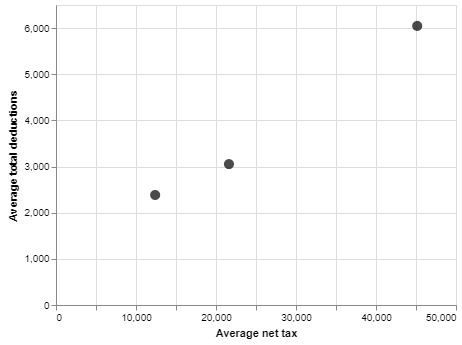

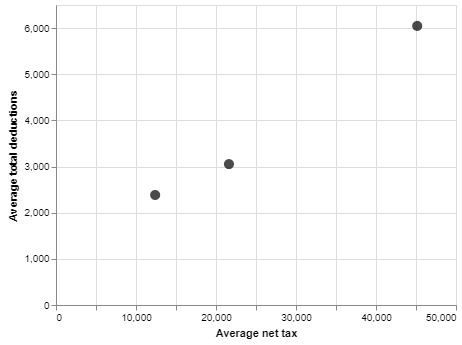

In [42]:
chart2 = alt.Chart(centroids).mark_circle(size=100).encode(x='Average net tax', y='Average total deductions', color=alt.value('black'),
    tooltip=['Average net tax', 'Average total deductions']).interactive()
chart2

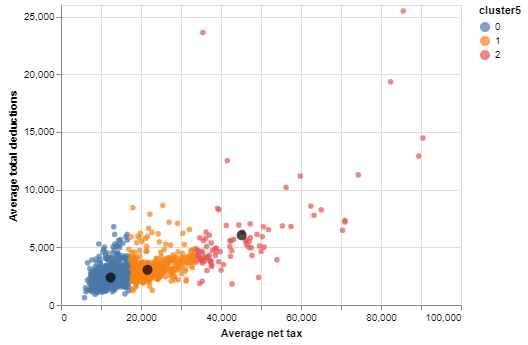

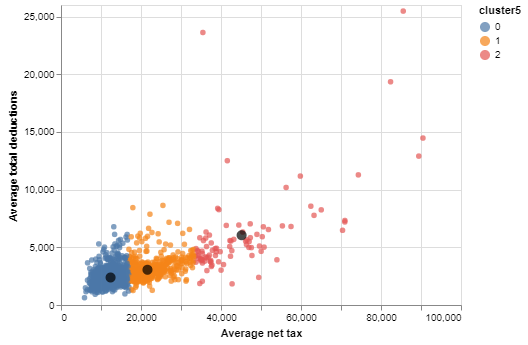

In [43]:
chart1 + chart2